# Feature Encoding

In [1]:
# System configuration 
import os 
import sys 
import matplotlib.pyplot as plt 

sys.path.append(os.path.abspath(".."))

## Data Loading

In [2]:
# Import functionalities to ingest data 
from scripts.collection.ingestor import FileIngestor

In [3]:
# Ingest data for feature encoding
ingestor = FileIngestor(folder="training", filename="laptop_price_dataset.csv")
dataset = ingestor.ingest()
dataset

,BRAND,PRICE,GPU,OPERATING_SYSTEM,TOUCHSCREEN,BLUETOOTH,HARD_DRIVE,SSD_CAPACITY,DISPLAY,WEBCAM(BUILT-IN),COLOR
0,other,303.80,intel,windows,NO,NO,512,1,NO,YES,gray
1,dell,175.00,intel,windows,NO,YES,500,500,YES,YES,black
2,hp,85.00,intel,chrome,YES,YES,16,240,YES,YES,black
3,dell,101.25,other,windows,NO,YES,256,256,YES,YES,other
4,acer,50.00,other,chrome,NO,NO,256,16,NO,YES,black
...,...,...,...,...,...,...,...,...,...,...,...
4177,other,162.20,other,unknown,NO,NO,256,240,NO,NO,other
4178,acer,93.25,other,unknown,NO,NO,256,240,NO,NO,other
4179,dell,424.80,intel,windows,NO,NO,256,120,NO,NO,black
4180,hp,90.94,other,unknown,YES,YES,256,240,NO,YES,other


## Feature Encoding

In [4]:
# Implement functionalities for feature encoding
from scripts.features.feature_encoder import OrdinalEncoder
from scripts.features.feature_encoder import NominalEncoder
from scripts.features.feature_encoder import BinaryEncoder

In [5]:
dataset

,BRAND,PRICE,GPU,OPERATING_SYSTEM,TOUCHSCREEN,BLUETOOTH,HARD_DRIVE,SSD_CAPACITY,DISPLAY,WEBCAM(BUILT-IN),COLOR
0,other,303.80,intel,windows,NO,NO,512,1,NO,YES,gray
1,dell,175.00,intel,windows,NO,YES,500,500,YES,YES,black
2,hp,85.00,intel,chrome,YES,YES,16,240,YES,YES,black
3,dell,101.25,other,windows,NO,YES,256,256,YES,YES,other
4,acer,50.00,other,chrome,NO,NO,256,16,NO,YES,black
...,...,...,...,...,...,...,...,...,...,...,...
4177,other,162.20,other,unknown,NO,NO,256,240,NO,NO,other
4178,acer,93.25,other,unknown,NO,NO,256,240,NO,NO,other
4179,dell,424.80,intel,windows,NO,NO,256,120,NO,NO,black
4180,hp,90.94,other,unknown,YES,YES,256,240,NO,YES,other


## Binary Encoding

In [6]:
# Initialise binary feature list 
binary_features = ["DISPLAY", "WEBCAM(BUILT-IN)", "TOUCHSCREEN", "BLUETOOTH"]

# Iteration: encode features to binary features
binary_encoder = BinaryEncoder()

for feature in binary_features:
    # Binary feature encoding: process
    feature_data = dataset[feature]
    dataset[feature] = binary_encoder.encode(feature_data)

dataset[binary_features]

,DISPLAY,WEBCAM(BUILT-IN),TOUCHSCREEN,BLUETOOTH
0,0,1,0,0
1,1,1,0,1
2,1,1,1,1
3,1,1,0,1
4,0,1,0,0
...,...,...,...,...
4177,0,0,0,0
4178,0,0,0,0
4179,0,0,0,0
4180,0,1,1,1


## Ordinal Encoding

In [7]:
# Initialise ordinal features & check its distribution
ordinal_features = ["BRAND", "GPU", "COLOR"]

# Implement function: show distribution of ordinal and nominal features
def distribution(feature: str): 
    feature_data = dataset[feature].value_counts().to_frame(name="COUNTS").reset_index()
    labels = [label.upper() for label in feature_data[feature].values]
    counts = feature_data["COUNTS"].values

    plt.figure(figsize=(14,8))
    bars = plt.bar(labels, counts, color="black")

    for bar in bars:
        bar.set_alpha(0.80)

    plt.xlabel(f"{feature}")
    plt.ylabel("COUNTS")
    plt.title(f"Feature Distribution ({feature.capitalize()})")
    plt.show()

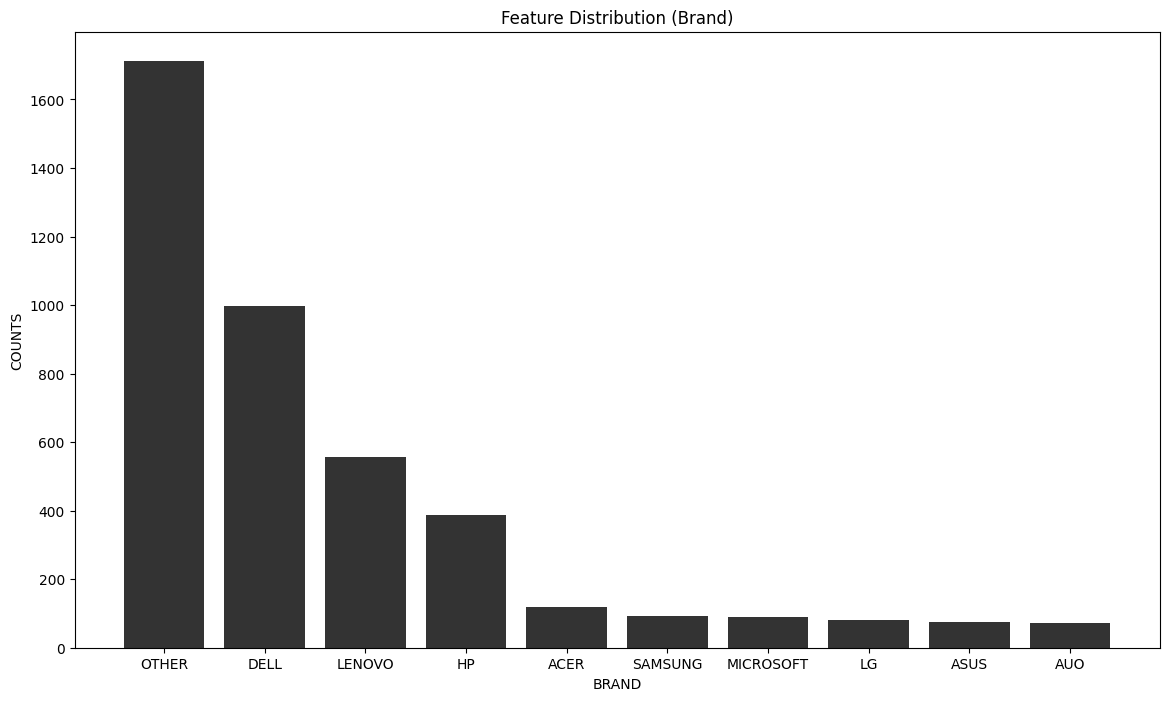

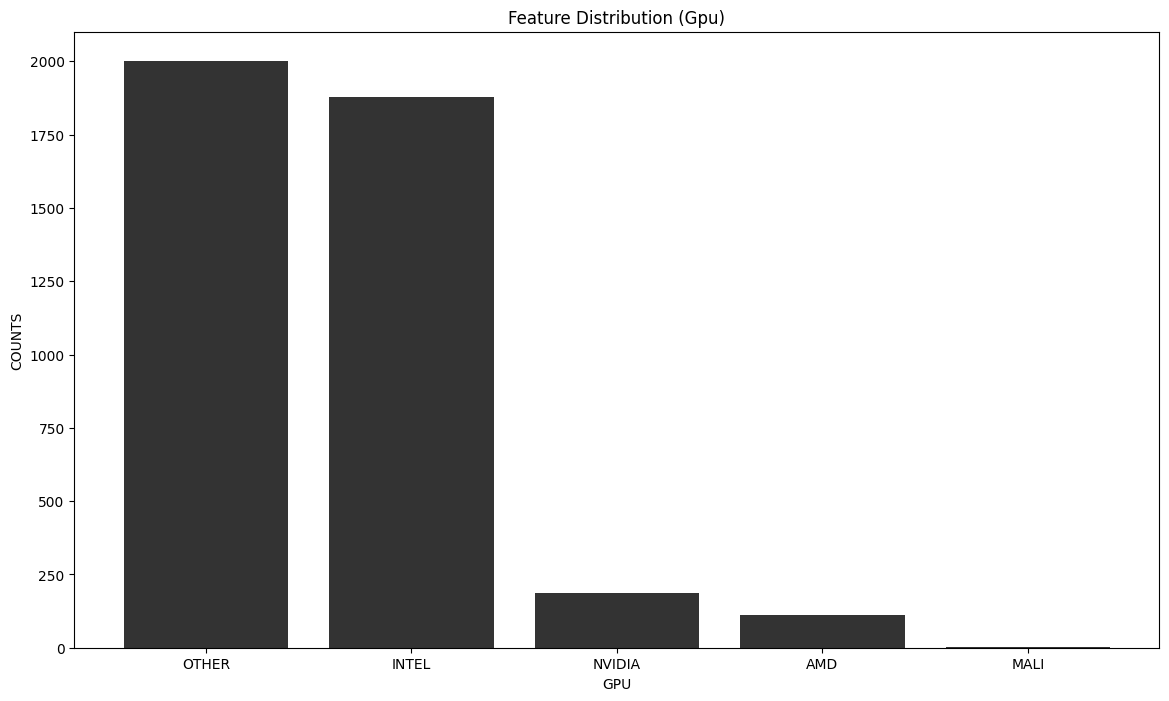

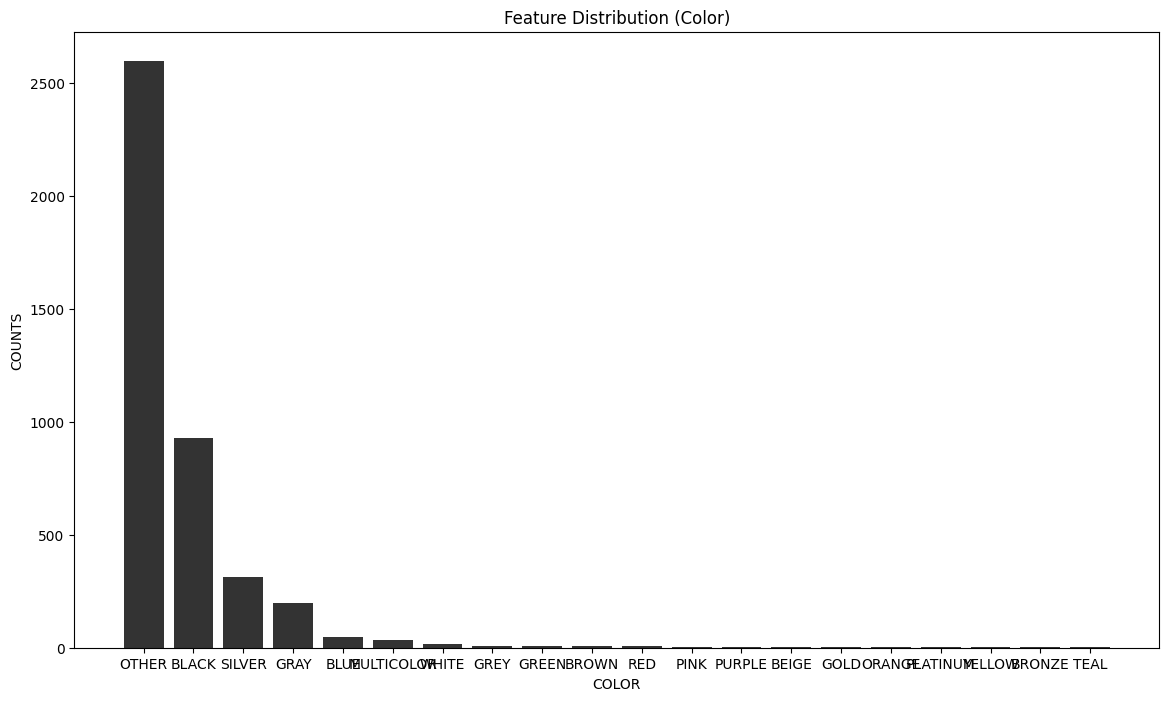

In [8]:
# Show distribution 
distribution(feature="BRAND")
distribution(feature="GPU")
distribution(feature="COLOR")

In [9]:
# Instantiate object from ordinal encoding
ordinal_encoder = OrdinalEncoder()
ordinal_features.remove("BRAND")
ordinal_features.remove("GPU")

for feature in ordinal_features:
    # Binary feature encoding: process
    feature_data = dataset[feature]
    dataset[feature] = ordinal_encoder.encode(feature_data)
    
dataset[ordinal_features]

,COLOR
0,6
1,1
2,1
3,11
4,1
...,...
4177,11
4178,11
4179,1
4180,11


## Nominal Encoding

In [10]:
# Initialise nominal features
nominal_features = ["BRAND", "GPU", "OPERATING_SYSTEM"]

# Nominal Encoding process
nominal_encoder = NominalEncoder()

# Nominal feature encoding: process
nominal_data1 = nominal_encoder.encode(dataset[nominal_features[0]], nominal_features[0])
nominal_data2 = nominal_encoder.encode(dataset[nominal_features[1]], nominal_features[1])
nominal_data3 = nominal_encoder.encode(dataset[nominal_features[2]], nominal_features[2])

nominal_data1.columns
nominal_data2.columns
nominal_data3.columns

Index(['OPERATING_SYSTEM_android', 'OPERATING_SYSTEM_chrome',
       'OPERATING_SYSTEM_linux', 'OPERATING_SYSTEM_mac',
       'OPERATING_SYSTEM_unknown', 'OPERATING_SYSTEM_windows'],
      dtype='object')

## Data Transformation

In [11]:
# Initialize functionalities for data transformation
from scripts.processing.transformer import ColumnTransformer

In [12]:
# Combine with dataset
column_transformer = ColumnTransformer()

# Combine dataset with nominal features
container = [dataset, nominal_data1, nominal_data2, nominal_data3] 
dataset_tf = column_transformer.combine(container)
dataset_tf

Number of datasets for Column Combination: 4


,BRAND,PRICE,GPU,OPERATING_SYSTEM,TOUCHSCREEN,BLUETOOTH,HARD_DRIVE,SSD_CAPACITY,DISPLAY,WEBCAM(BUILT-IN),...,GPU_intel,GPU_mali,GPU_nvidia,GPU_other,OPERATING_SYSTEM_android,OPERATING_SYSTEM_chrome,OPERATING_SYSTEM_linux,OPERATING_SYSTEM_mac,OPERATING_SYSTEM_unknown,OPERATING_SYSTEM_windows
0,other,303.80,intel,windows,0,0,512,1,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,dell,175.00,intel,windows,0,1,500,500,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,hp,85.00,intel,chrome,1,1,16,240,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,dell,101.25,other,windows,0,1,256,256,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,acer,50.00,other,chrome,0,0,256,16,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,other,162.20,other,unknown,0,0,256,240,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4178,acer,93.25,other,unknown,0,0,256,240,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4179,dell,424.80,intel,windows,0,0,256,120,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4180,hp,90.94,other,unknown,1,1,256,240,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
dataset_tf.columns

Index(['BRAND', 'PRICE', 'GPU', 'OPERATING_SYSTEM', 'TOUCHSCREEN', 'BLUETOOTH',
       'HARD_DRIVE', 'SSD_CAPACITY', 'DISPLAY', 'WEBCAM(BUILT-IN)', 'COLOR',
       'BRAND_acer', 'BRAND_asus', 'BRAND_auo', 'BRAND_dell', 'BRAND_hp',
       'BRAND_lenovo', 'BRAND_lg', 'BRAND_microsoft', 'BRAND_other',
       'BRAND_samsung', 'GPU_amd', 'GPU_intel', 'GPU_mali', 'GPU_nvidia',
       'GPU_other', 'OPERATING_SYSTEM_android', 'OPERATING_SYSTEM_chrome',
       'OPERATING_SYSTEM_linux', 'OPERATING_SYSTEM_mac',
       'OPERATING_SYSTEM_unknown', 'OPERATING_SYSTEM_windows'],
      dtype='object')

In [14]:
# Delete features that are irrelevant: Brand, GPU, Operating System
column_transformer.delete(['BRAND', 'GPU', 'OPERATING_SYSTEM'], 2)
column_transformer.dataset

,PRICE,TOUCHSCREEN,BLUETOOTH,HARD_DRIVE,SSD_CAPACITY,DISPLAY,WEBCAM(BUILT-IN),COLOR,BRAND_acer,BRAND_asus,...,GPU_intel,GPU_mali,GPU_nvidia,GPU_other,OPERATING_SYSTEM_android,OPERATING_SYSTEM_chrome,OPERATING_SYSTEM_linux,OPERATING_SYSTEM_mac,OPERATING_SYSTEM_unknown,OPERATING_SYSTEM_windows
0,303.80,0,0,512,1,0,1,6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,175.00,0,1,500,500,1,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,85.00,1,1,16,240,1,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,101.25,0,1,256,256,1,1,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,50.00,0,0,256,16,0,1,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,162.20,0,0,256,240,0,0,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4178,93.25,0,0,256,240,0,0,11,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4179,424.80,0,0,256,120,0,0,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4180,90.94,1,1,256,240,0,1,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Data Storage

In [15]:
# implement functionalities
from scripts.collection.saver import OneFileSaver

In [18]:
# Save the preprocessed dataset
file_saver = OneFileSaver(folder="data/training")
file_saver.save(column_transformer.dataset, filename="processed_lp_data")

File processed_lp_data.csv has been stored successfully
